In [1]:
%load_ext autoreload
%autoreload 2

In [104]:
import numpy as np
import pandas as pd
import cv2
import module_extraction as f

分析対象のファイルの指定

In [61]:
img_path = '../ModuleExtraction/hokuto/thermal/DJI_0123_R.JPG'
img_org = cv2.imread(img_path, 0)
thermal_npdat_path = "../ModuleExtraction/hokuto/thermal"

フィルタの適用

In [62]:
img_averaged = f.apply_filters(img_org, thermal_npdat_path)

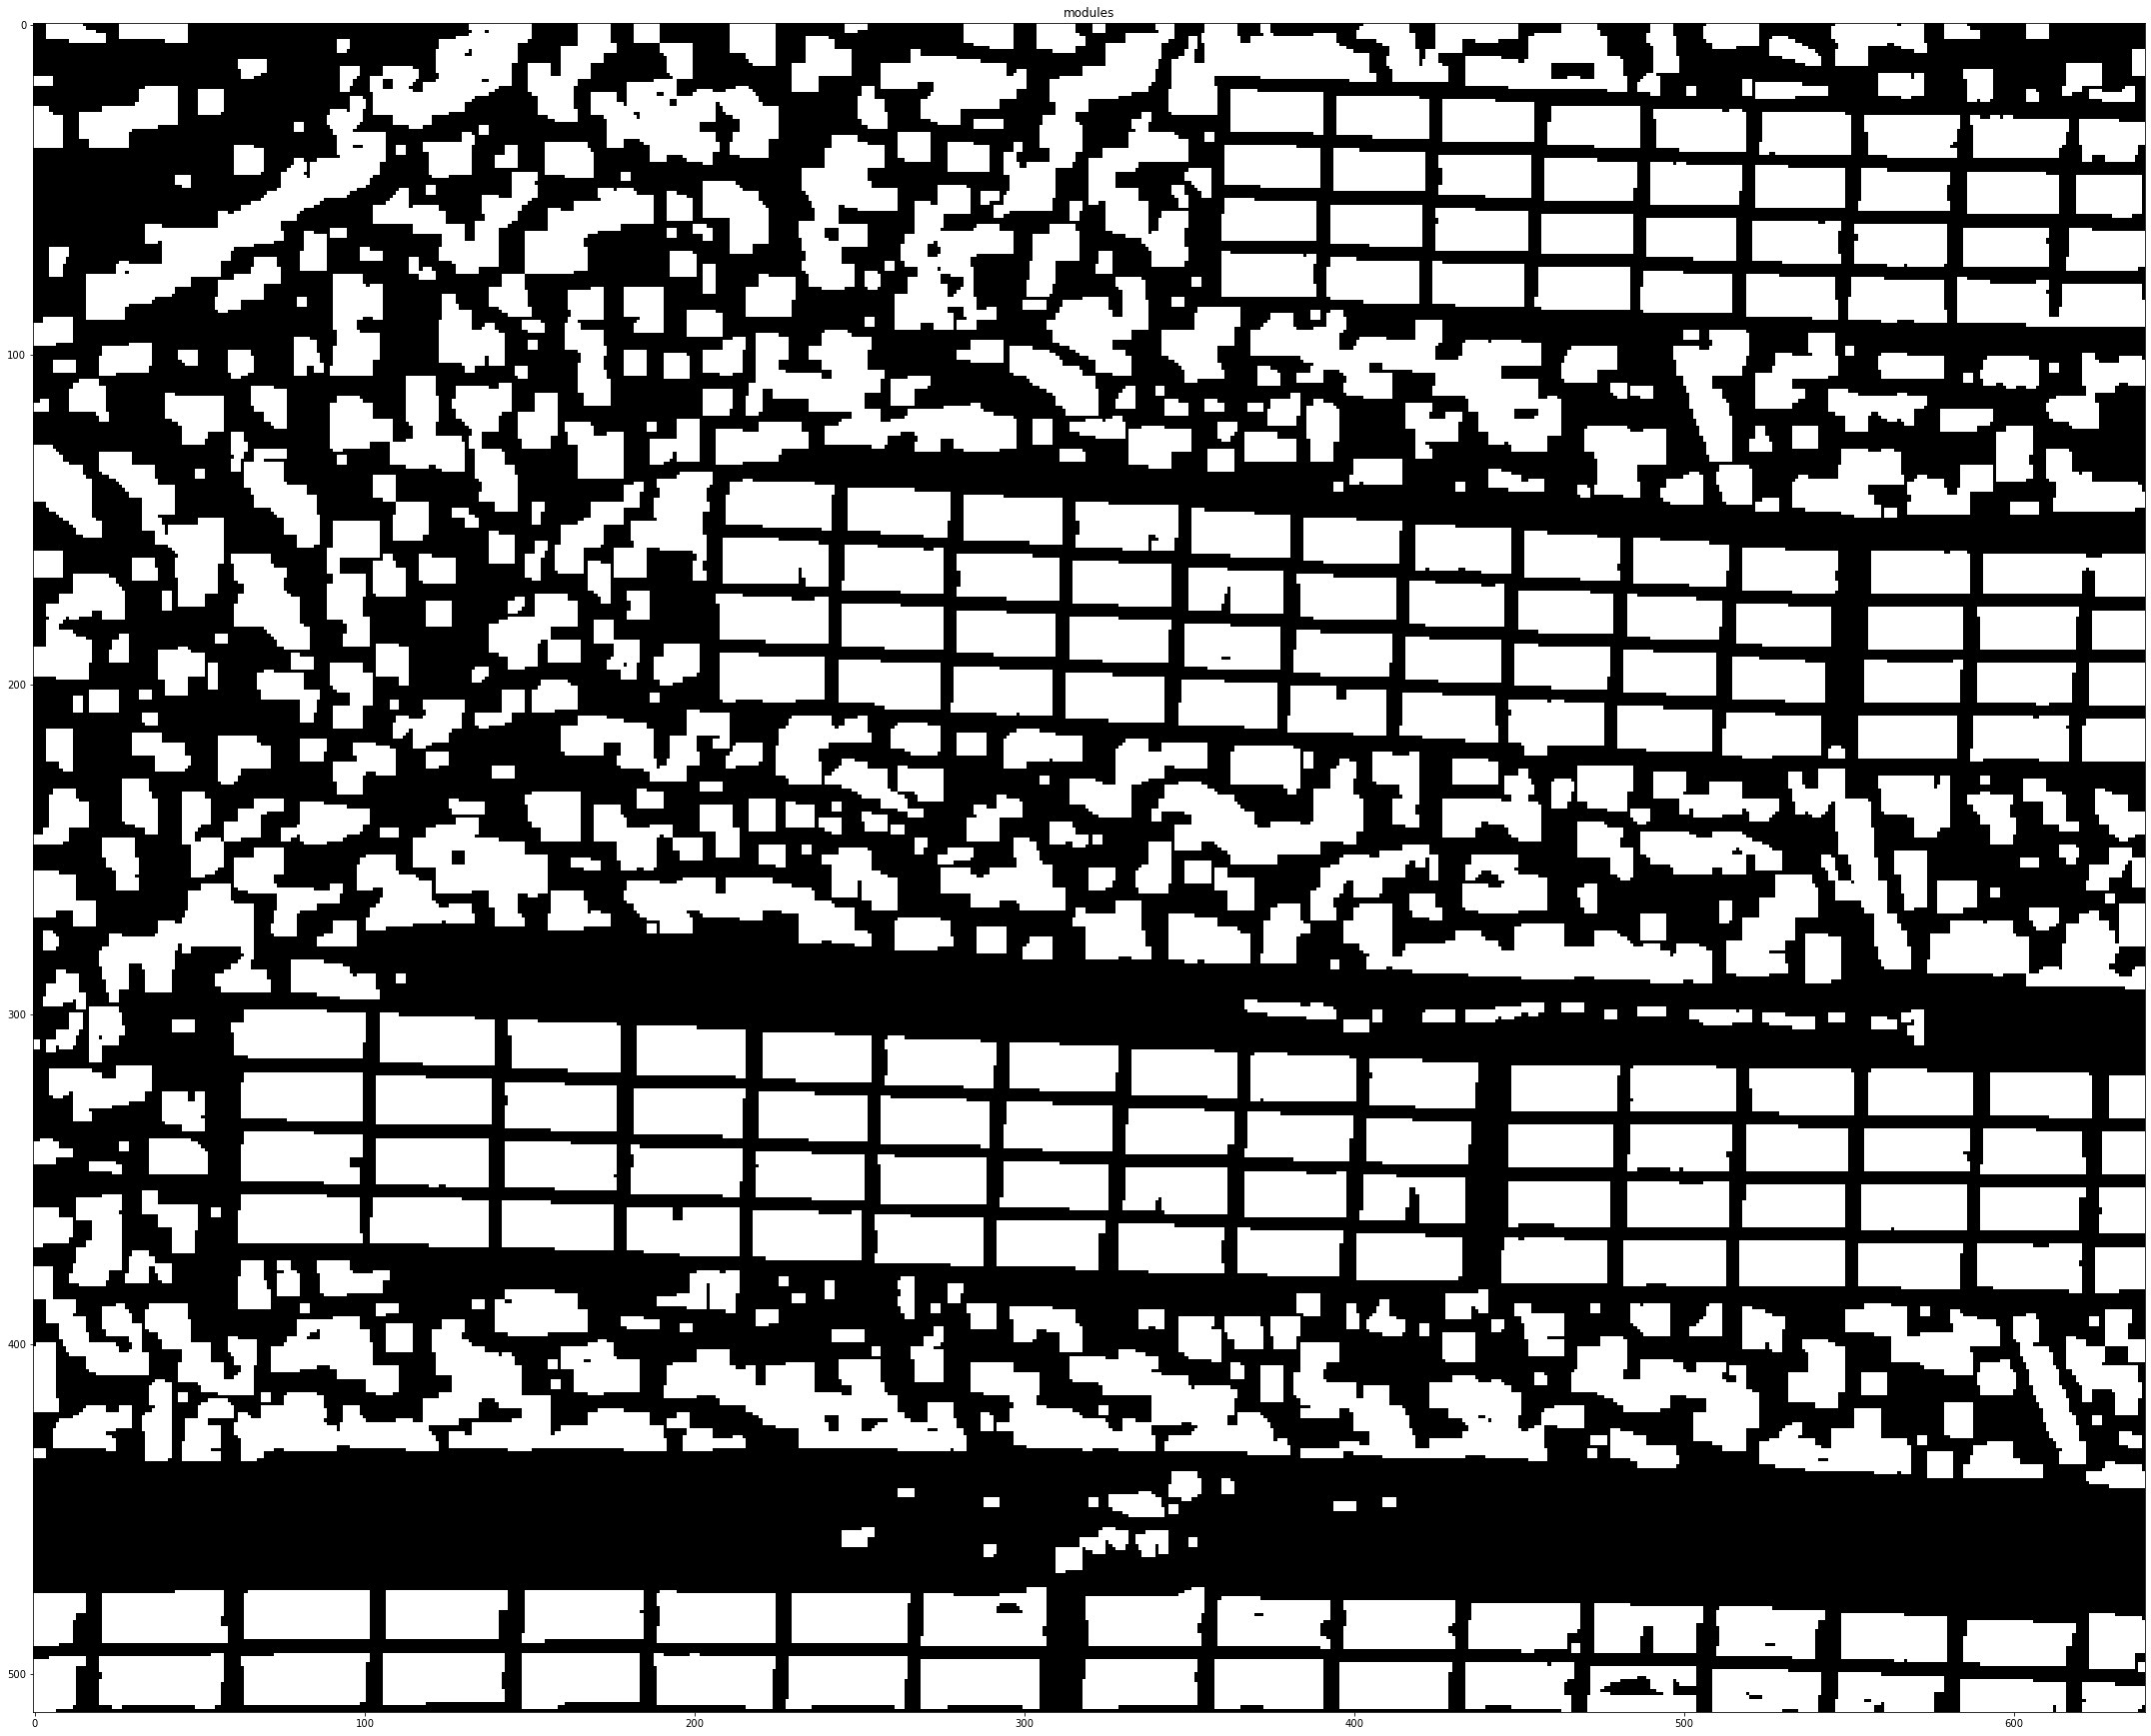

In [103]:
f.show_img({"modules":img_averaged},cmap="gray",figsize=(30,30))

（段階的な確認）

In [73]:
#lower_lim_pix_val, upper_lim_pix_val = f.get_limits(thermal_npdat_path)
#img_normed = f.normalize(img_org, lower_lim_pix_val, upper_lim_pix_val, show=True)

In [74]:
#img_clahe = f.clahe(img_normed, show=True)

In [76]:
#img_blured = f.blur(img_clahe, show=True)

In [77]:
#img_bilateral_filtered = f.bilateral_filter(img_blured, show=True)

In [78]:
#img_sharpen = f.sharpen(img_bilateral_filtered, show=True)

In [79]:
#img_opening = f.opening(img_sharpen, show=True)

In [80]:
#img_eight_bit_scaled = f.eight_bit_scaler(img_opening, show=True)

In [81]:
#img_averaged = f.averaged_opening_data(img_eight_bit_scaled, show=True)

モジュール輪郭情報の取得

In [98]:
contours, hierarchy = cv2.findContours(
    img_averaged.astype(np.uint8), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [83]:
panel_contours = f.get_panel_contours(contours)

In [99]:
img_con = f.get_img_contours(img_org, panel_contours)
img_con_index = f.add_index(img_con, panel_contours)

/Users/tnozawa/afterFIT/work/rule_based_anomaly_detection/module_extraction.py:82: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.tight_layout()


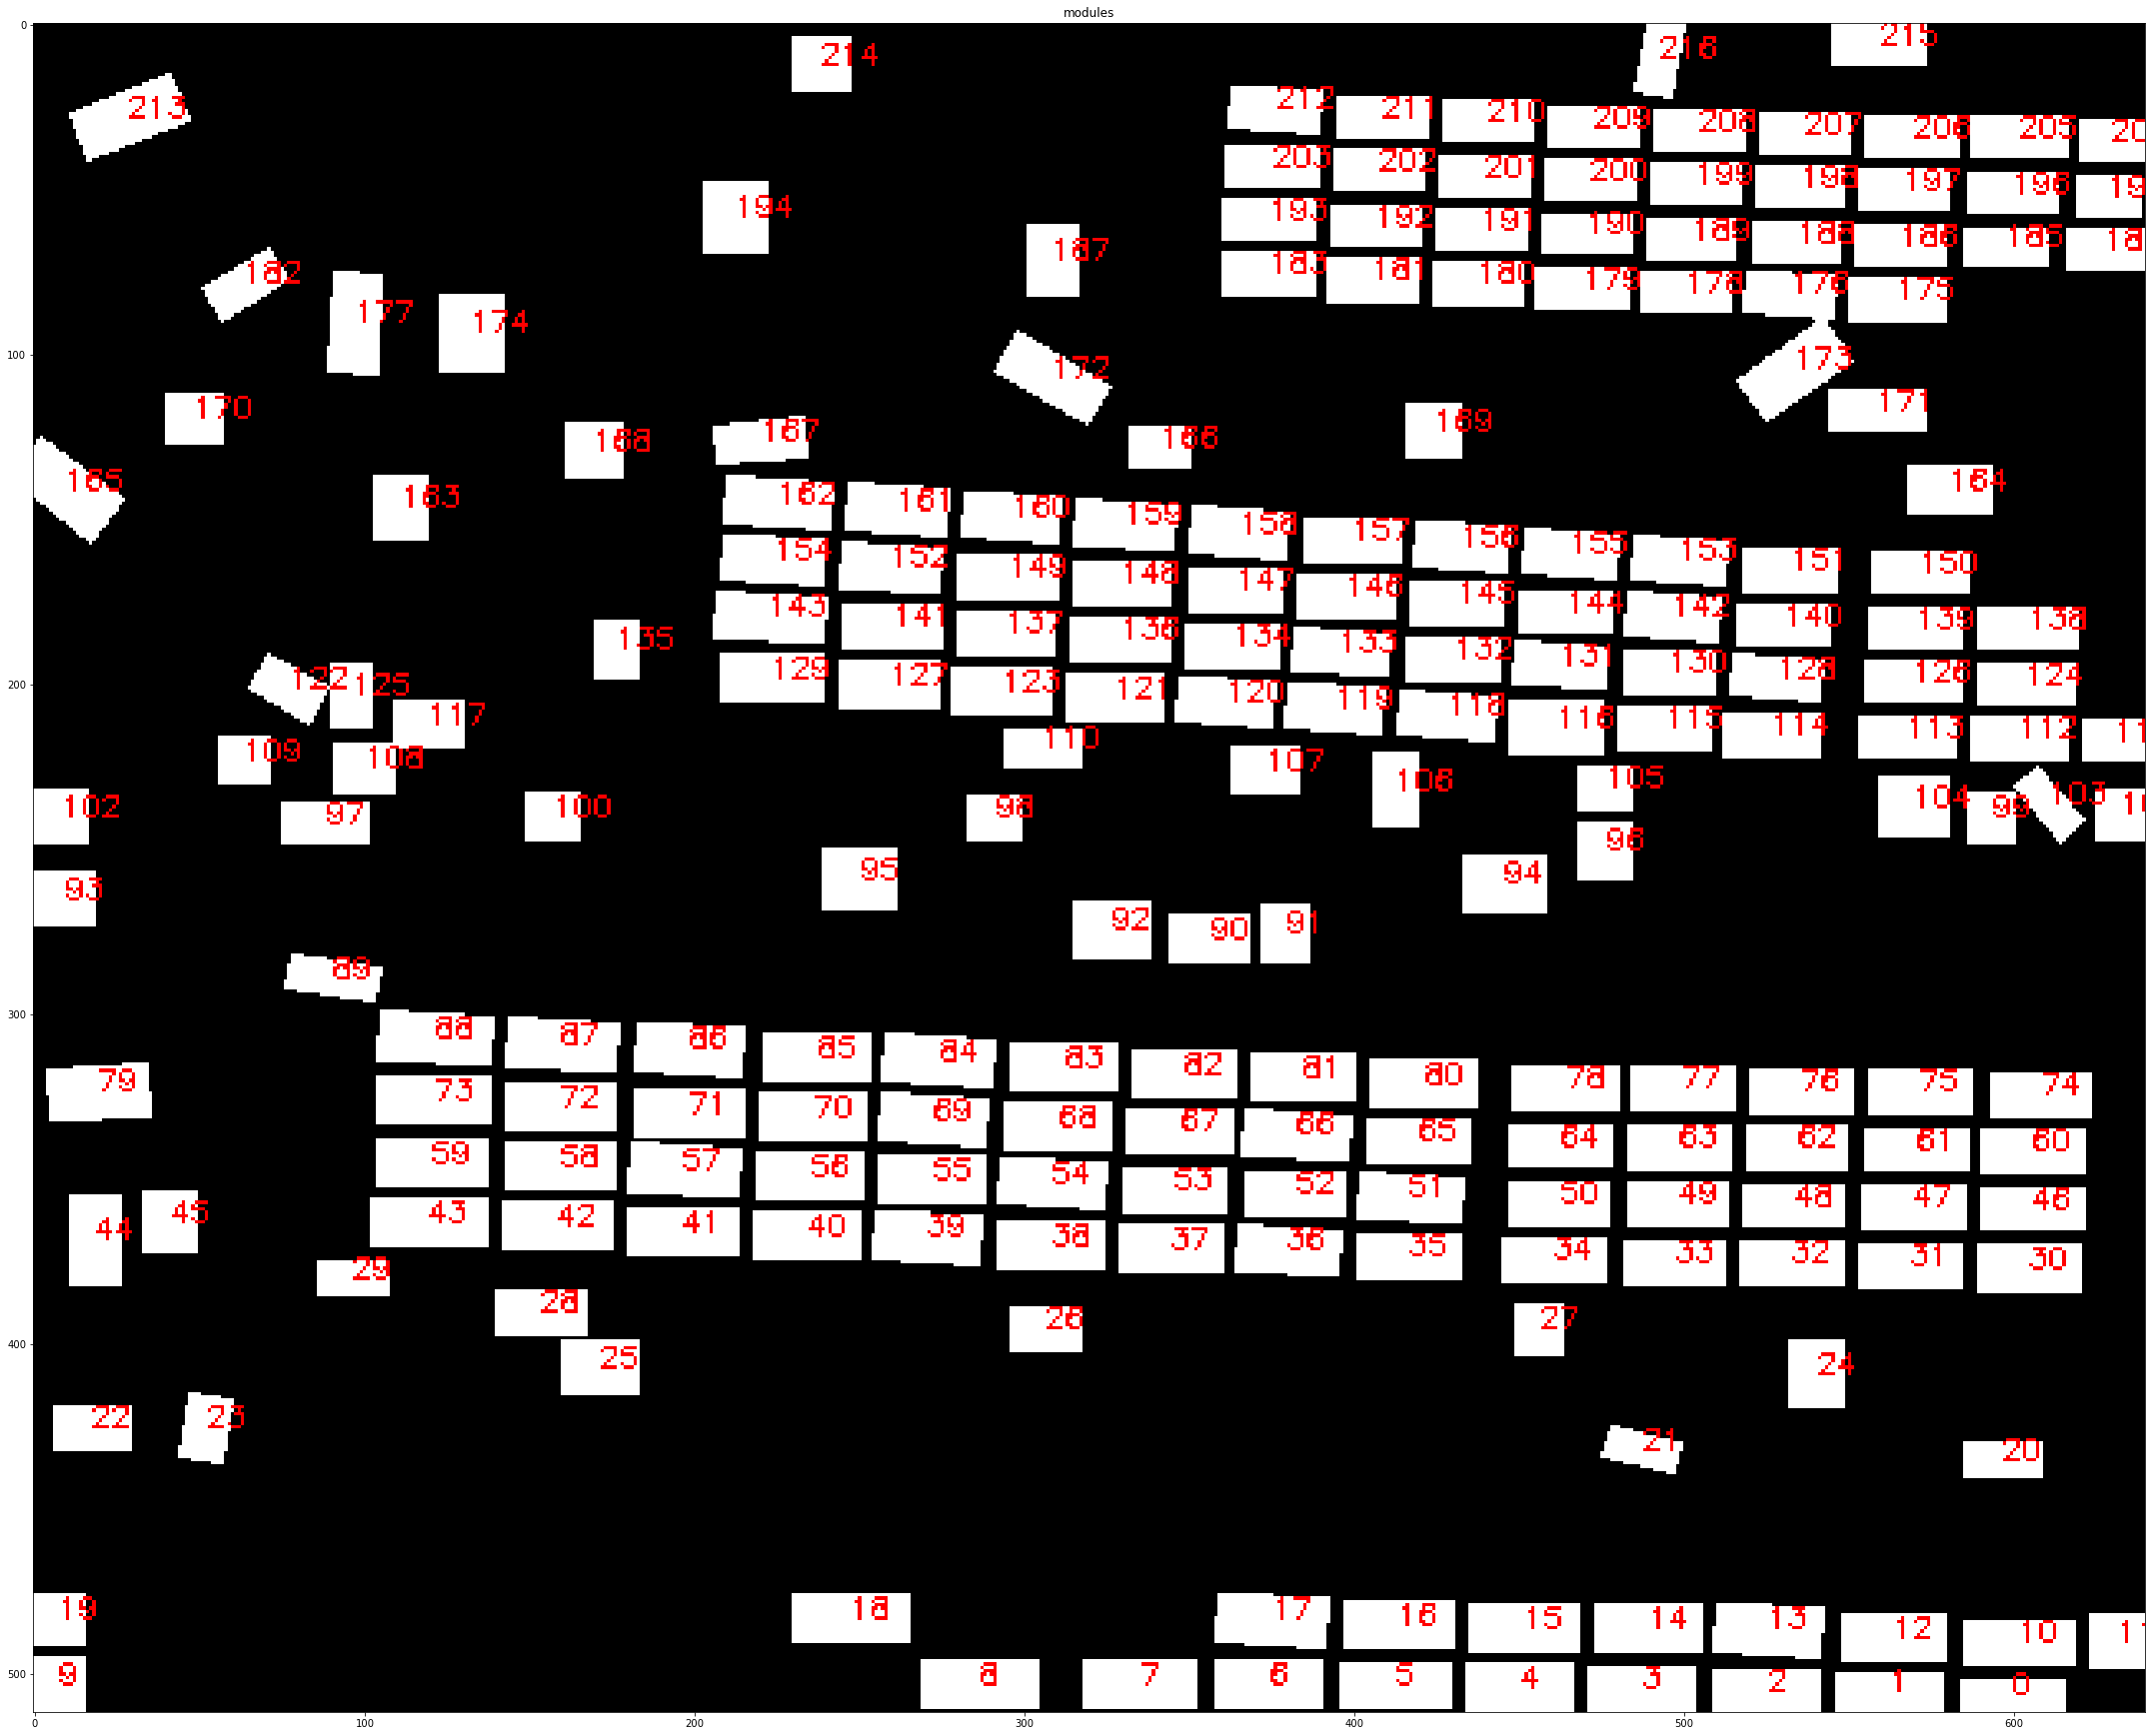

In [100]:
f.show_img({"modules":img_con_index},cmap="gray",figsize=(30,30))

In [101]:
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = f.add_index(img_mask, panel_contours)

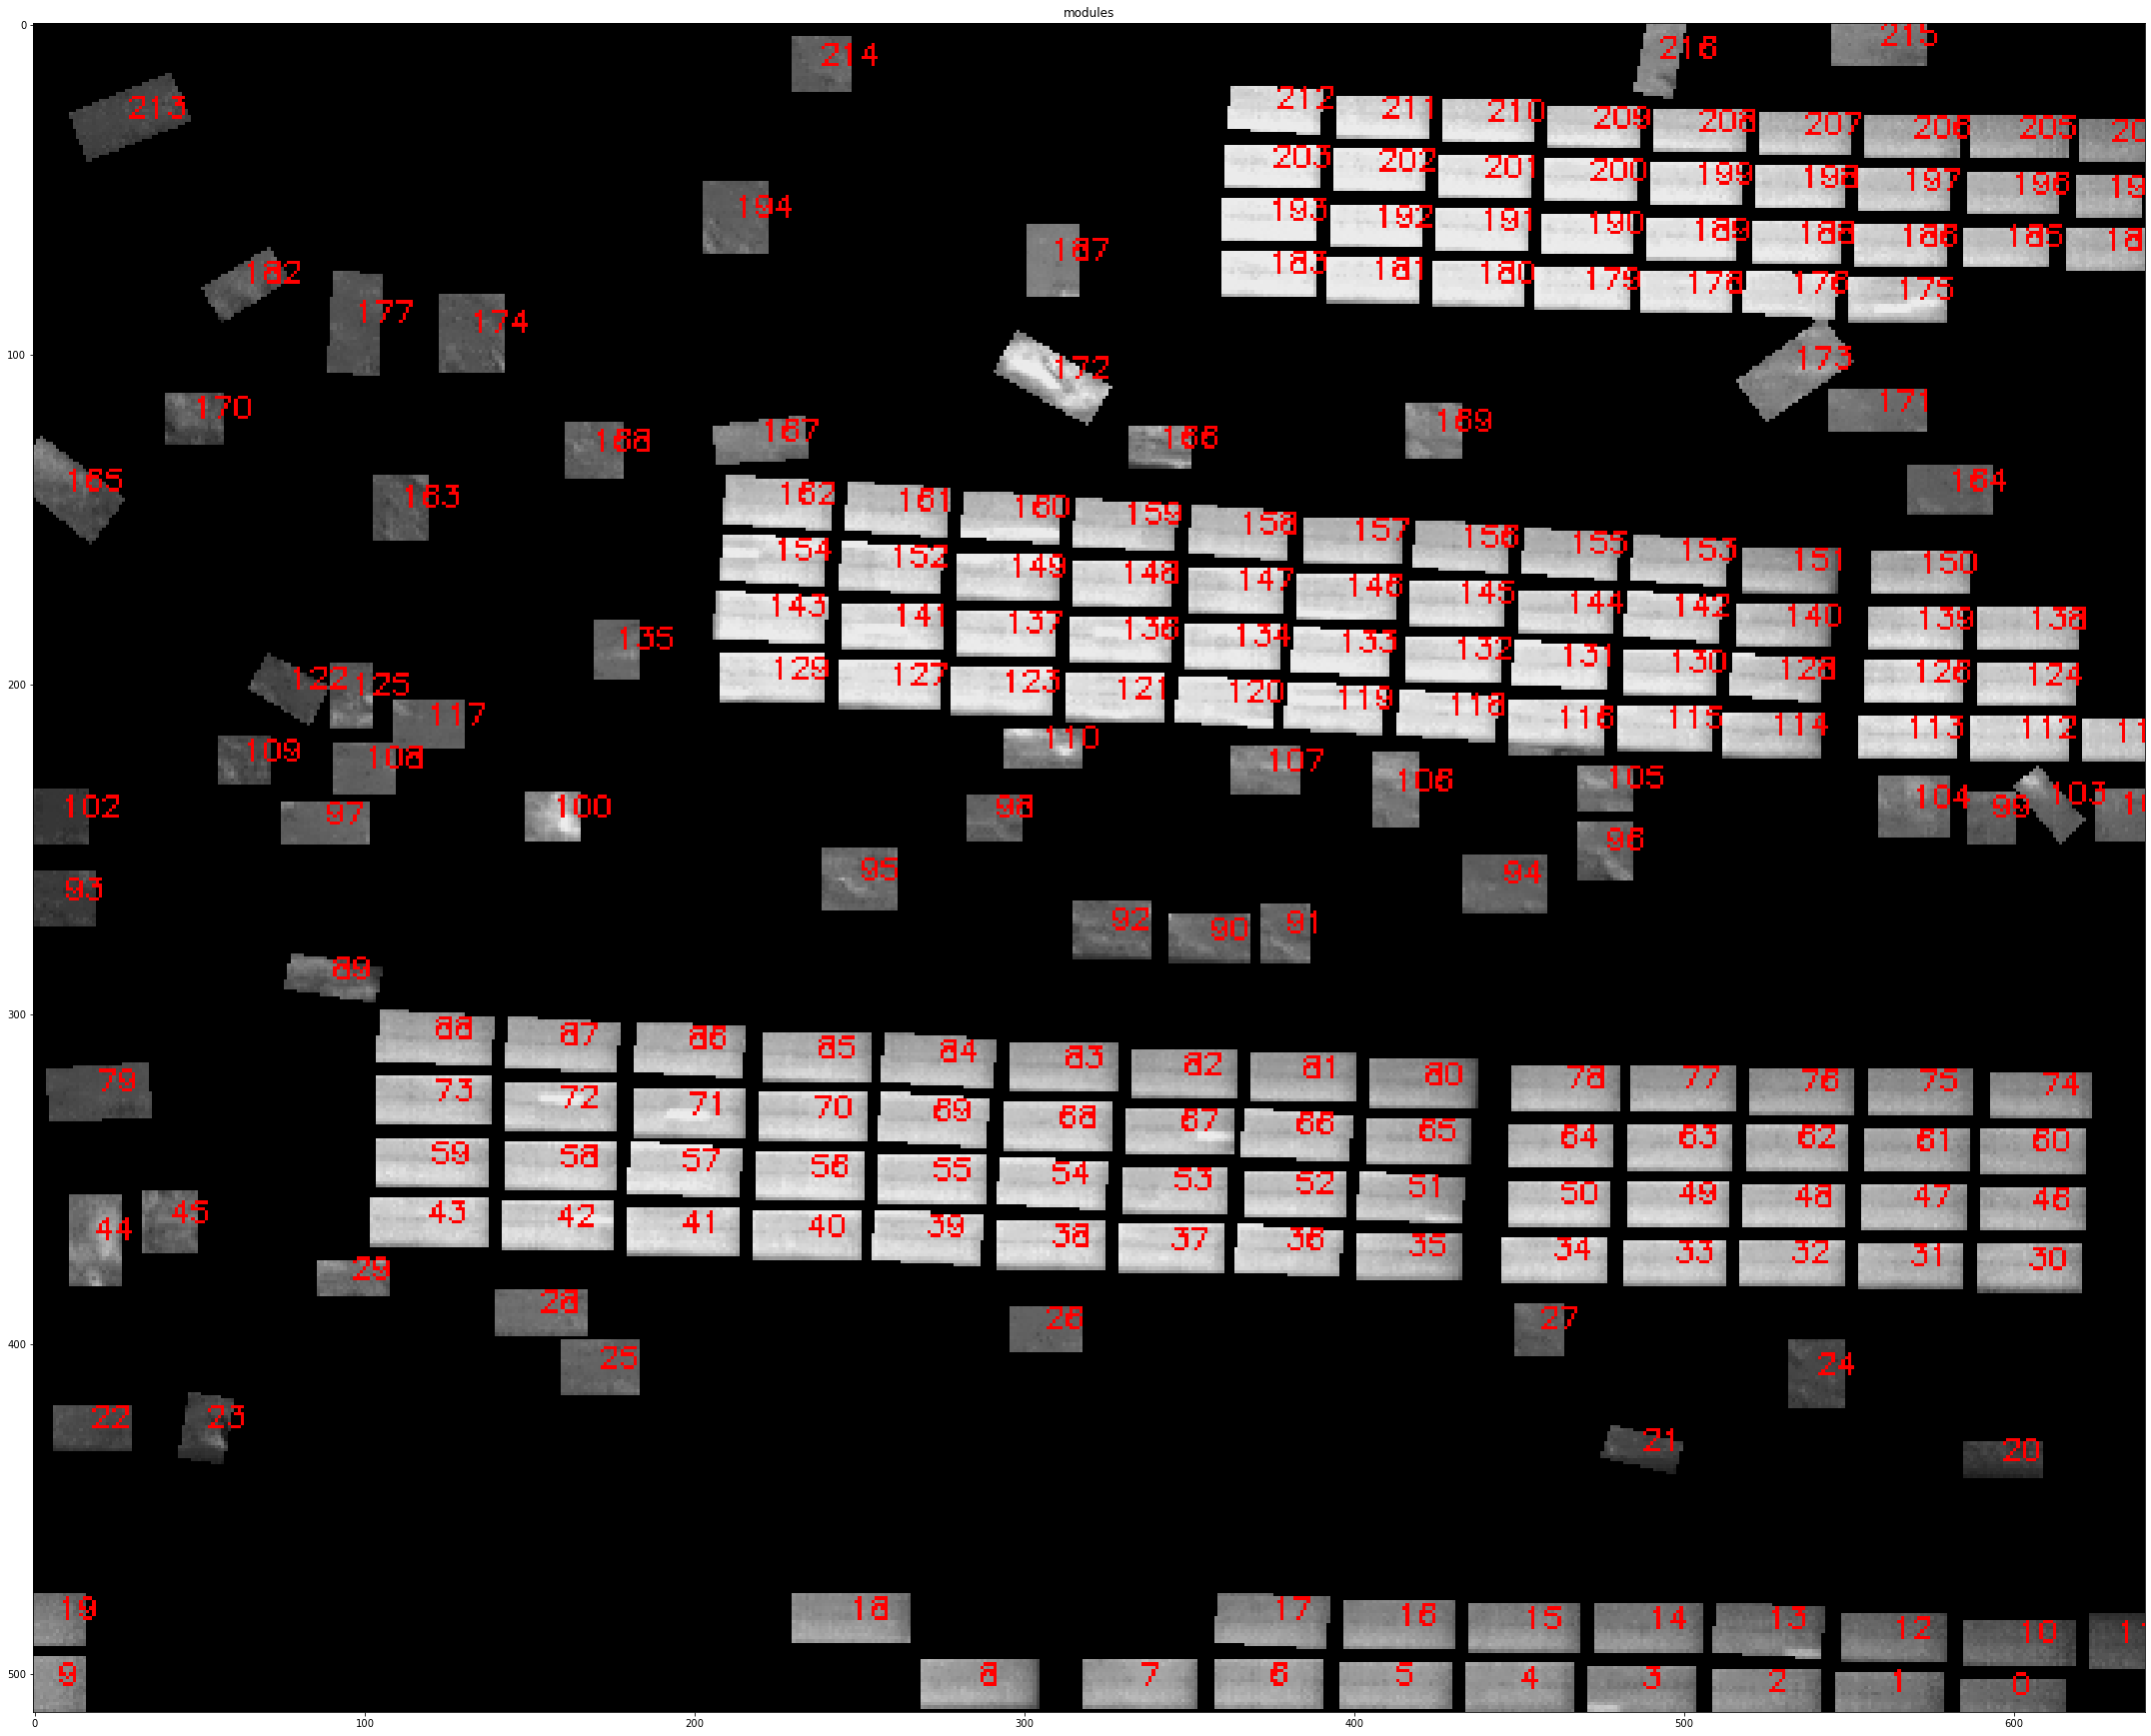

In [102]:
f.show_img({"modules":img_mask_index},cmap="gray",figsize=(30,30))

ハイライトモジュールの指定

In [220]:
df = pd.read_csv("modules_Module-Anomaly.csv")
#df = pd.read_csv("modules_Single-Hotspot.csv")
#df = pd.read_csv("modules_Multi-Hotspots.csv")
anomaly_module_index = df.applymap(lambda x: np.int(x.split(".")[0]))

In [221]:
anomaly_module_index.values.flatten()

array([189, 200, 201, 203, 202, 199, 129, 121, 123, 136, 127, 180, 181,
       183, 141, 192, 179, 178, 193, 191, 190])

In [222]:
#target_contours = np.array(panel_contours)[np.array([0,1])]
target_contours = np.array(panel_contours)[anomaly_module_index.values.flatten()]

In [223]:
img_filled = f.fill_target_panels(img_con, target_contours)
img_filled_index = f.add_index(img_filled, panel_contours)

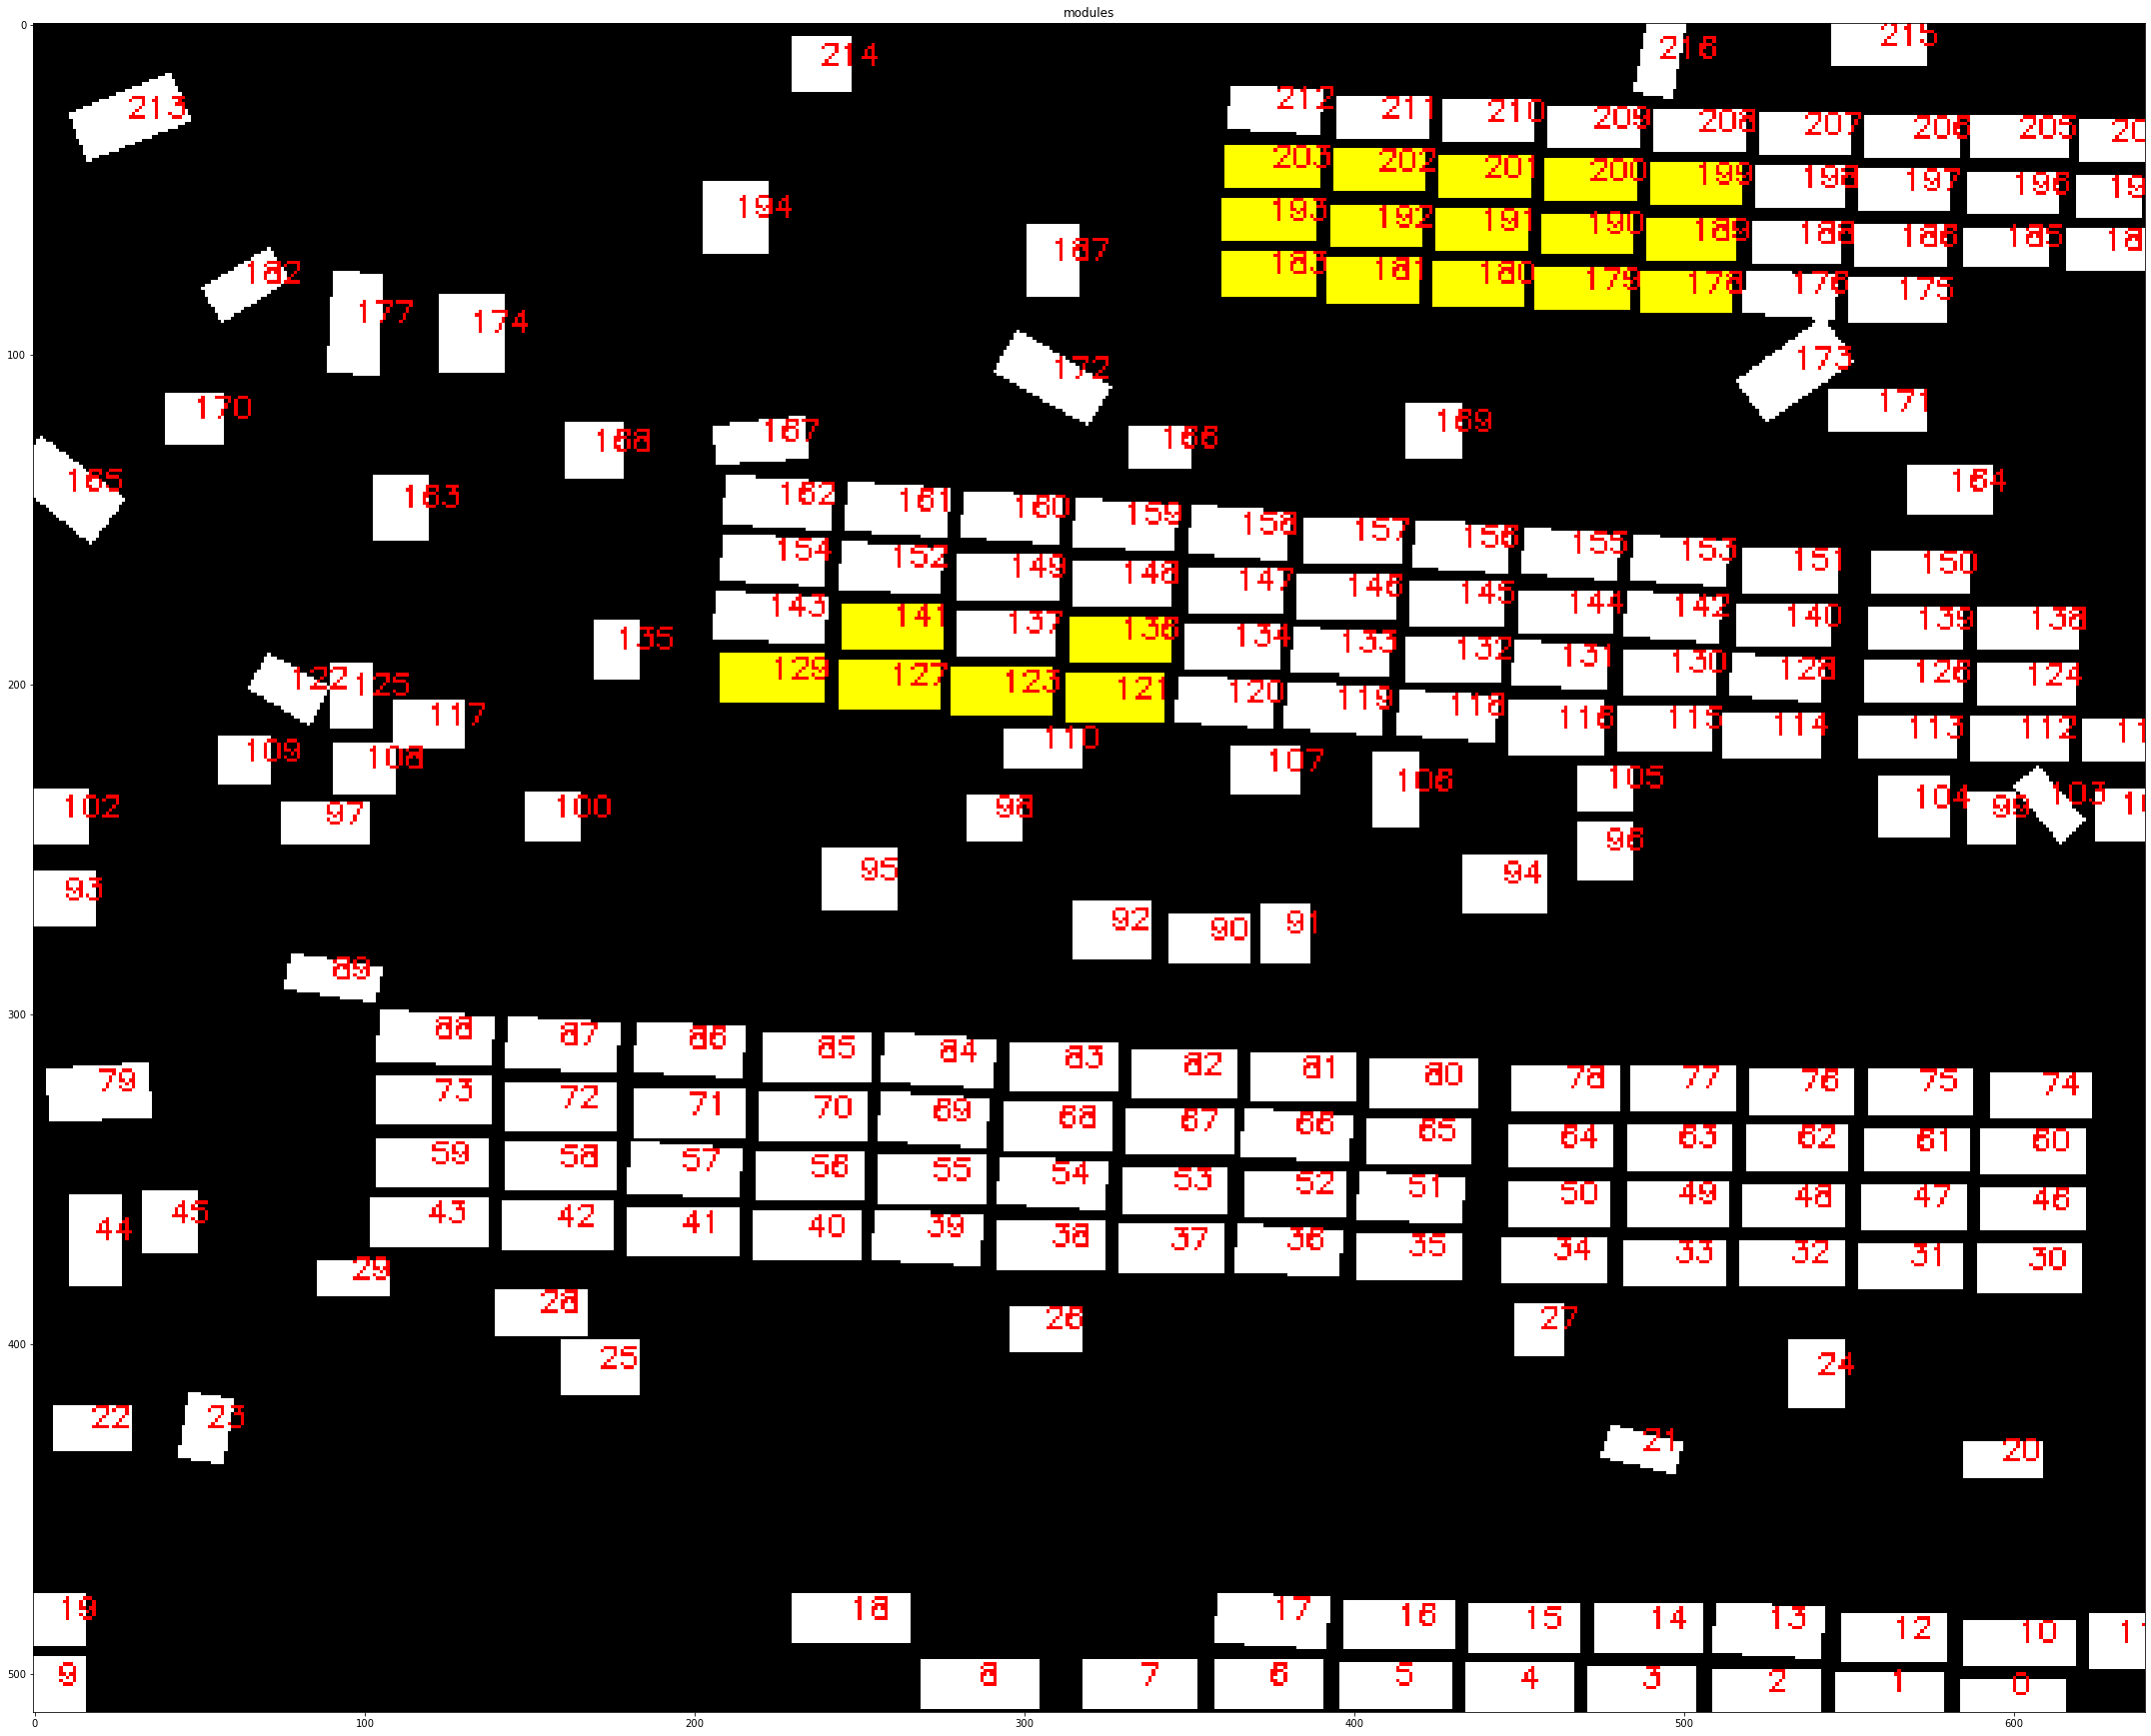

In [224]:
f.show_img({"modules":img_filled_index},cmap="gray",figsize=(30,30))

In [225]:
#centers = np.array( [c.mean(axis=0) for c in panel_contours] )
centers = np.array( [c.mean(axis=0) for c in target_contours] )

In [226]:
from sklearn.cluster import DBSCAN

In [227]:
#model = DBSCAN(eps=50, min_samples=10).fit(centers)
model = DBSCAN(eps=50, min_samples=2).fit(centers)

In [228]:
model.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

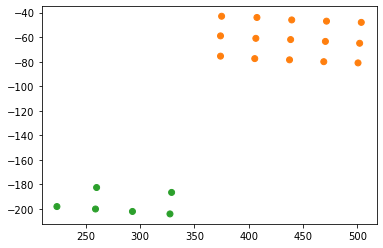

In [229]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")
plt.scatter(centers[:,0],-centers[:,1], color=cmap(model.labels_+1))
plt.show()